## Citrone performance Project

### Introduction
This project trains a machine learning model that will predict if a student will graduate / move from the beginner class to the intermediate class or not from the Stutern learning management platform (Citrone)

The columns in the dataset include:

 - S/N : Serial Number
 - Name : Names of Student
 - Email: Student's email address
 - Address: Student's Address during Application
 - Lesson Summary: Date column
 - Quiz Summary
 - Assignment Summary	Grade Point Average	Intermediate class Eligibility

Due to the limited data point available for the initial training of the model, more data were generated random online from this website, the data were generated to reflect real world stutern student's data.
Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#plt.style.use(style="seaborn")
%matplotlib inline

In [18]:
# Read in the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of Citrone Performance overview_id.xlsx")

In [19]:
df.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes
2,3,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes
3,4,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes
4,5,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes


Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

In [20]:
# Downloaded dummy data from https://www.mockaroo.com/
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MOCK_DATA_1.csv")

In [21]:
df1.head()

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc,Intermediate class Eligibility
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False,True
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False,False


In [22]:
# Creating a copy of the data
# It is best practice to always make a copy of your dataset
df2 = df1.copy()

## Data Cleaning

In [23]:
df2.head()

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc,Intermediate class Eligibility
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False,True
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False,False


In [24]:
df2 = df2.drop(columns=["Intermediate class Eligibility"], axis=True)

In [25]:
df2

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False
...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,2023-02-20,76,1,6,Male,23,False,True
996,997,NaN,2023-02-04,60,99,54,Male,24,True,True
997,998,NaN,2023-04-10,93,37,17,Female,18,True,False
998,999,NaN,2023-01-19,64,19,16,Male,20,True,False


In [26]:
# Concatenating both dataframes
data = pd.concat([df, df2], axis=False)

In [27]:
data.columns

Index(['S/N', 'Name', 'Email Address', 'Lesson Summary', 'Quiz Summary',
       'Assignment Summary', 'Grade Point Average',
       'Intermediate class Eligibility', 'Gender', 'Age', 'Children',
       'Completed_Nysc'],
      dtype='object')

In [28]:
# replace column spaces with underscore
new_columns = []
for column in data.columns:
    if " " in column:
        fill = column.replace(" ", "_")
        new_columns.append(fill)
    else:
        new_columns.append(column)

In [29]:
new_columns

['S/N',
 'Name',
 'Email_Address',
 'Lesson_Summary',
 'Quiz_Summary',
 'Assignment_Summary',
 'Grade_Point_Average',
 'Intermediate_class_Eligibility',
 'Gender',
 'Age',
 'Children',
 'Completed_Nysc']

In [30]:
data.columns = new_columns

In [31]:
data = data.drop(columns=["Intermediate_class_Eligibility"], axis=1)#citrone_data = data.to_csv("citrone_data.csv", index=False)

In [32]:
data

,S/N,Name,Email_Address,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
0,1.0,id_1,NaN,0/5,NaN,0,0.0,NaN,NaN,NaN,NaN
1,2.0,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,NaN,NaN,NaN,NaN
2,3.0,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,NaN,NaN,NaN,NaN
3,4.0,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,NaN,NaN,NaN,NaN
4,5.0,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,996,NaN,2023-02-20,76.0,1,6.0,Male,23.0,False,True
996,NaN,997,NaN,2023-02-04,60.0,99,54.0,Male,24.0,True,True
997,NaN,998,NaN,2023-04-10,93.0,37,17.0,Female,18.0,True,False
998,NaN,999,NaN,2023-01-19,64.0,19,16.0,Male,20.0,True,False


In [33]:
# Checking the null  values in the dataframes, Notice that there are columns with no values at all
data.isna().sum()

,0
S/N,1000
Name,0
Email_Address,1060
Lesson_Summary,0
Quiz_Summary,60
Assignment_Summary,0
Grade_Point_Average,0
Gender,60
Age,60
Children,60


In [34]:
# Dropping the blank columns ( columns with no values will not add value to my machine learning model)
data = data.drop(columns=["Name","Email_Address"], axis=1)

In [35]:
#data["intermediate_eligibility"] = data["Grade_Point_Average"].apply(grade_point)

In [36]:
data

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
0,1.0,0/5,NaN,0,0.0,NaN,NaN,NaN,NaN
1,2.0,2023-05-05 00:00:00,NaN,70,56.0,NaN,NaN,NaN,NaN
2,3.0,2023-02-05 00:00:00,NaN,80,64.0,NaN,NaN,NaN,NaN
3,4.0,2023-05-05 00:00:00,NaN,100,80.0,NaN,NaN,NaN,NaN
4,5.0,2023-06-05 00:00:00,NaN,80,64.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,NaN,2023-02-20,76.0,1,6.0,Male,23.0,False,True
996,NaN,2023-02-04,60.0,99,54.0,Male,24.0,True,True
997,NaN,2023-04-10,93.0,37,17.0,Female,18.0,True,False
998,NaN,2023-01-19,64.0,19,16.0,Male,20.0,True,False


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S/N                  60 non-null     float64
 1   Lesson_Summary       1060 non-null   object 
 2   Quiz_Summary         1000 non-null   float64
 3   Assignment_Summary   1060 non-null   int64  
 4   Grade_Point_Average  1060 non-null   float64
 5   Gender               1000 non-null   object 
 6   Age                  1000 non-null   float64
 7   Children             1000 non-null   object 
 8   Completed_Nysc       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 82.8+ KB


In [38]:
data.isna().sum()

,0
S/N,1000
Lesson_Summary,0
Quiz_Summary,60
Assignment_Summary,0
Grade_Point_Average,0
Gender,60
Age,60
Children,60
Completed_Nysc,60


## Dealing with missing data

In [39]:
# Imputing missing data using SimpleImputer
from sklearn.impute import SimpleImputer
#data["Assignment Summary","Grade Point Average"].fillna(np.median())

In [40]:
missing_col = data[["Quiz_Summary", "Age"]]

In [41]:
imp_median = SimpleImputer(strategy="median")
missing_col_1 = imp_median.fit_transform(missing_col)

In [42]:
changed= pd.DataFrame(missing_col_1, columns=["Quiz_Summary", "Age"])

In [43]:
missing_col = changed

In [44]:
missing_col

,Quiz_Summary,Age
0,74.0,29.0
1,74.0,29.0
2,74.0,29.0
3,74.0,29.0
4,74.0,29.0
...,...,...
1055,76.0,23.0
1056,60.0,24.0
1057,93.0,18.0
1058,64.0,20.0


In [45]:
data[["Quiz_Summary", "Age"]] = changed

In [46]:
data

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
0,1.0,0/5,74.0,0,0.0,NaN,29.0,NaN,NaN
1,2.0,2023-05-05 00:00:00,74.0,70,56.0,NaN,29.0,NaN,NaN
2,3.0,2023-02-05 00:00:00,74.0,80,64.0,NaN,29.0,NaN,NaN
3,4.0,2023-05-05 00:00:00,74.0,100,80.0,NaN,29.0,NaN,NaN
4,5.0,2023-06-05 00:00:00,74.0,80,64.0,NaN,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,NaN,2023-02-20,49.0,1,6.0,Male,32.0,False,True
996,NaN,2023-02-04,92.0,99,54.0,Male,27.0,True,True
997,NaN,2023-04-10,84.0,37,17.0,Female,31.0,True,False
998,NaN,2023-01-19,47.0,19,16.0,Male,23.0,True,False


In [47]:
# Checking for missing data again
data.isna().sum()

,0
S/N,1000
Lesson_Summary,0
Quiz_Summary,0
Assignment_Summary,0
Grade_Point_Average,0
Gender,60
Age,0
Children,60
Completed_Nysc,60


In [48]:
#imp_cat = SimpleImputer(strategy="most_frequent")

In [49]:
#cat_data = imp_cat.fit_transform(categorical)

In [50]:
#pd.DataFrame(cat_data, columns= categorical.columns)

In [51]:
# Filling categorical data and boolean data with mode (Pandas method)
data.Gender = data.Gender.fillna(data.Gender.mode()[0])

In [52]:
data.Children = data.Children.fillna(data.Children.mode()[0])

In [53]:
data.Completed_Nysc = data.Completed_Nysc.fillna(data.Completed_Nysc.mode()[0])

In [54]:
data.isna().sum()

,0
S/N,1000
Lesson_Summary,0
Quiz_Summary,0
Assignment_Summary,0
Grade_Point_Average,0
Gender,0
Age,0
Children,0
Completed_Nysc,0


In [55]:
data.head()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
0,1.0,0/5,74.0,0,0.0,Male,29.0,True,True
1,2.0,2023-05-05 00:00:00,74.0,70,56.0,Male,29.0,True,True
2,3.0,2023-02-05 00:00:00,74.0,80,64.0,Male,29.0,True,True
3,4.0,2023-05-05 00:00:00,74.0,100,80.0,Male,29.0,True,True
4,5.0,2023-06-05 00:00:00,74.0,80,64.0,Male,29.0,True,True


In [56]:
#Calculating the correct values for Grade point Avg column
data.Grade_Point_Average = (data.Quiz_Summary + data.Assignment_Summary) /2

In [57]:
data.Grade_Point_Average

,Grade_Point_Average
0,37.0
1,72.0
2,77.0
3,87.0
4,77.0
...,...
995,25.0
996,95.5
997,60.5
998,33.0


In [58]:
#Calculating the correct values for Grade point Avg column
def grade_point(column):
    """This fuction helps to categorize students that passed from student that failed"""
    if column >= 50:
        return "Yes"
    else:
        return "No"

In [59]:
# Applying the function to eligibility column
data["intermediate_eligibility"] = data["Grade_Point_Average"].apply(grade_point)

In [60]:
data.head()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,1.0,0/5,74.0,0,37.0,Male,29.0,True,True,No
1,2.0,2023-05-05 00:00:00,74.0,70,72.0,Male,29.0,True,True,Yes
2,3.0,2023-02-05 00:00:00,74.0,80,77.0,Male,29.0,True,True,Yes
3,4.0,2023-05-05 00:00:00,74.0,100,87.0,Male,29.0,True,True,Yes
4,5.0,2023-06-05 00:00:00,74.0,80,77.0,Male,29.0,True,True,Yes


In [61]:
## Mapping the target variable to numerial value

In [62]:
data.intermediate_eligibility

,intermediate_eligibility
0,No
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,No
996,Yes
997,Yes
998,No


In [63]:
data["intermediate_eligibility"] = data["intermediate_eligibility"].map({"No":0, "Yes":1})

In [64]:
data.head()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,1.0,0/5,74.0,0,37.0,Male,29.0,True,True,0
1,2.0,2023-05-05 00:00:00,74.0,70,72.0,Male,29.0,True,True,1
2,3.0,2023-02-05 00:00:00,74.0,80,77.0,Male,29.0,True,True,1
3,4.0,2023-05-05 00:00:00,74.0,100,87.0,Male,29.0,True,True,1
4,5.0,2023-06-05 00:00:00,74.0,80,77.0,Male,29.0,True,True,1


In [65]:
data = data.drop(columns=["S/N","Lesson_Summary"], axis=1)

In [66]:
data.head()

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,74.0,0,37.0,Male,29.0,True,True,0
1,74.0,70,72.0,Male,29.0,True,True,1
2,74.0,80,77.0,Male,29.0,True,True,1
3,74.0,100,87.0,Male,29.0,True,True,1
4,74.0,80,77.0,Male,29.0,True,True,1


In [67]:
#data.to_csv("cleaned.csv", index= False)

In [68]:
citrone_data = data.to_csv("cleaned_data.csv", index=False)

### Exploratory Data Analysis

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Quiz_Summary              1060 non-null   float64
 1   Assignment_Summary        1060 non-null   int64  
 2   Grade_Point_Average       1060 non-null   float64
 3   Gender                    1060 non-null   object 
 4   Age                       1060 non-null   float64
 5   Children                  1060 non-null   bool   
 6   Completed_Nysc            1060 non-null   bool   
 7   intermediate_eligibility  1060 non-null   int64  
dtypes: bool(2), float64(3), int64(2), object(1)
memory usage: 60.0+ KB


In [70]:
data.describe()

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Age,intermediate_eligibility
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,73.380189,49.350000,61.365094,29.059434,0.726415
std,15.228997,30.019873,16.669699,6.159453,0.446009
min,45.000000,0.000000,24.000000,18.000000,0.000000
25%,62.000000,22.000000,48.500000,24.000000,0.000000
50%,74.000000,51.000000,61.000000,29.000000,1.000000
75%,86.000000,75.000000,74.500000,34.000000,1.000000
max,100.000000,100.000000,99.500000,40.000000,1.000000


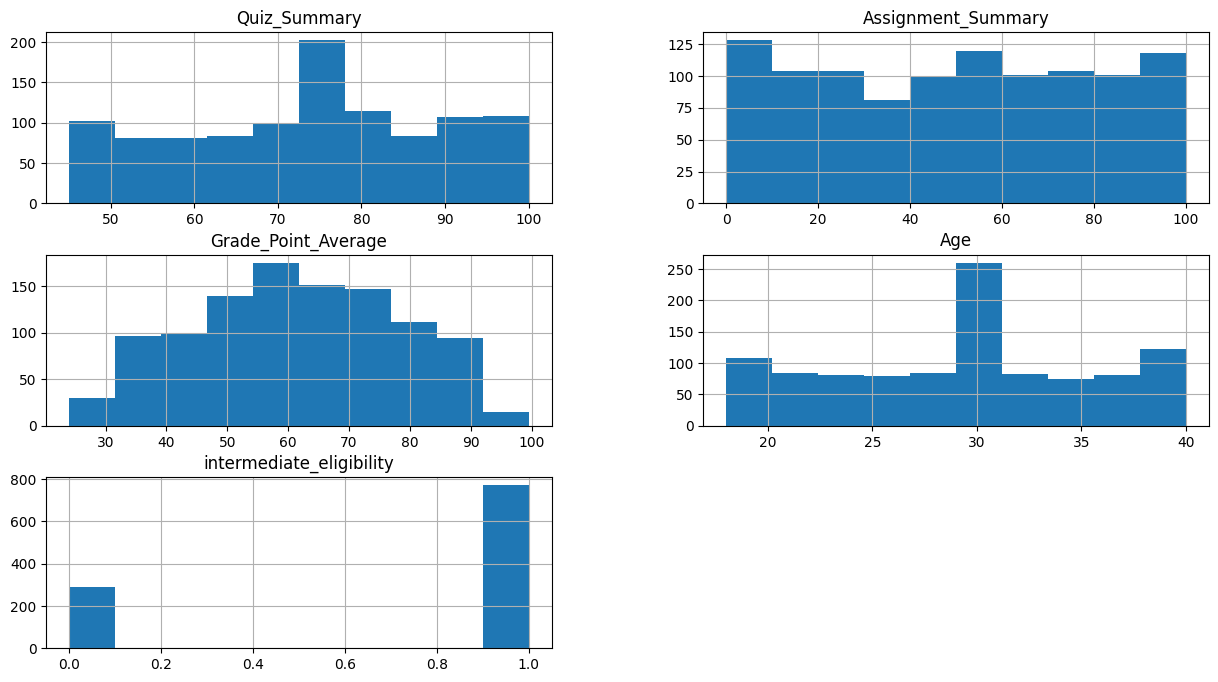

In [71]:
data.hist(figsize=(15, 8));

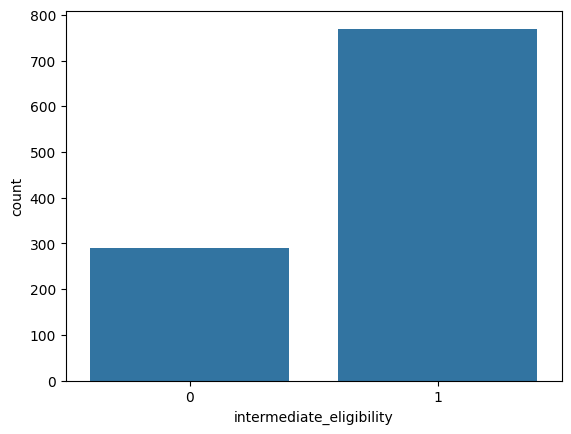

In [72]:
sns.countplot(data=data, x= "intermediate_eligibility");

In [73]:
data

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,74.0,0,37.0,Male,29.0,True,True,0
1,74.0,70,72.0,Male,29.0,True,True,1
2,74.0,80,77.0,Male,29.0,True,True,1
3,74.0,100,87.0,Male,29.0,True,True,1
4,74.0,80,77.0,Male,29.0,True,True,1
...,...,...,...,...,...,...,...,...
995,49.0,1,25.0,Male,32.0,False,True,0
996,92.0,99,95.5,Male,27.0,True,True,1
997,84.0,37,60.5,Female,31.0,True,False,1
998,47.0,19,33.0,Male,23.0,True,False,0


In [75]:
data.select_dtypes("number").corr()["intermediate_eligibility"]

,intermediate_eligibility
Quiz_Summary,0.315898
Assignment_Summary,0.699728
Grade_Point_Average,0.774355
Age,-0.010918
intermediate_eligibility,1.000000


In [77]:
# Checking the correlation between the target variable and other numerical variables
#data.corr()["intermediate_eligibility"]

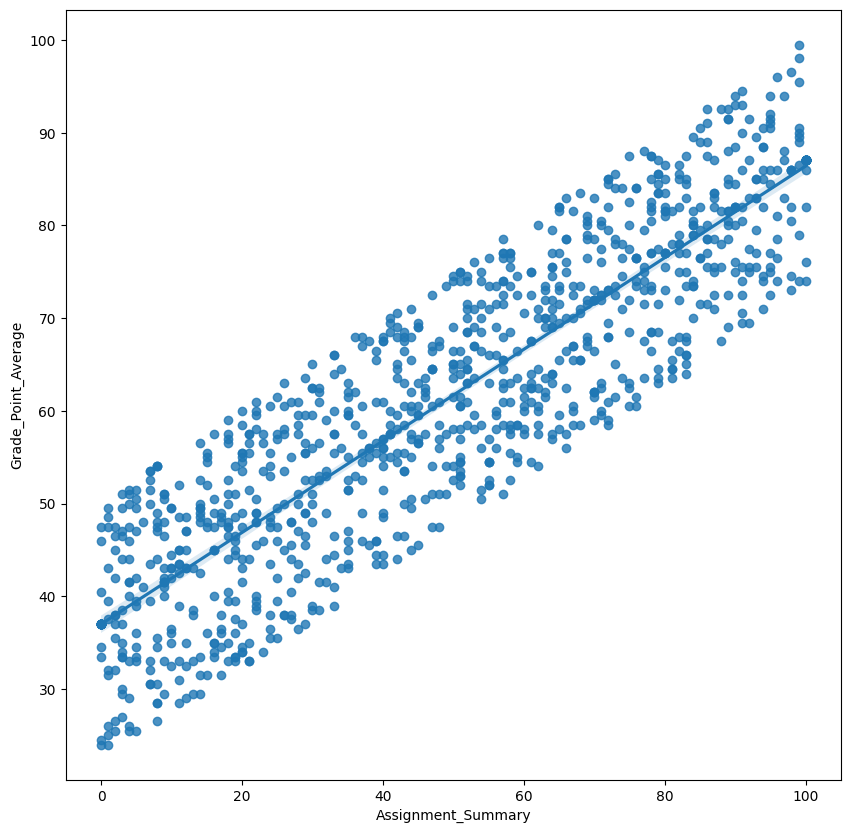

In [78]:
fig = plt.figure(figsize=(10, 10))
sns.regplot(x=data.Assignment_Summary, y=data.Grade_Point_Average);

In [79]:
def draw_regplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist(bins =20,ax=ax,facecolor='midnightblue')
        sns.regplot(data=dataframe, x =dataframe[feature], y= "Grade_Point_Average")
        ax.set_title(feature+" Regression plot",color='DarkRed')

    fig.tight_layout()
    plt.show()
#draw_regplot(data,data.columns,6,3)

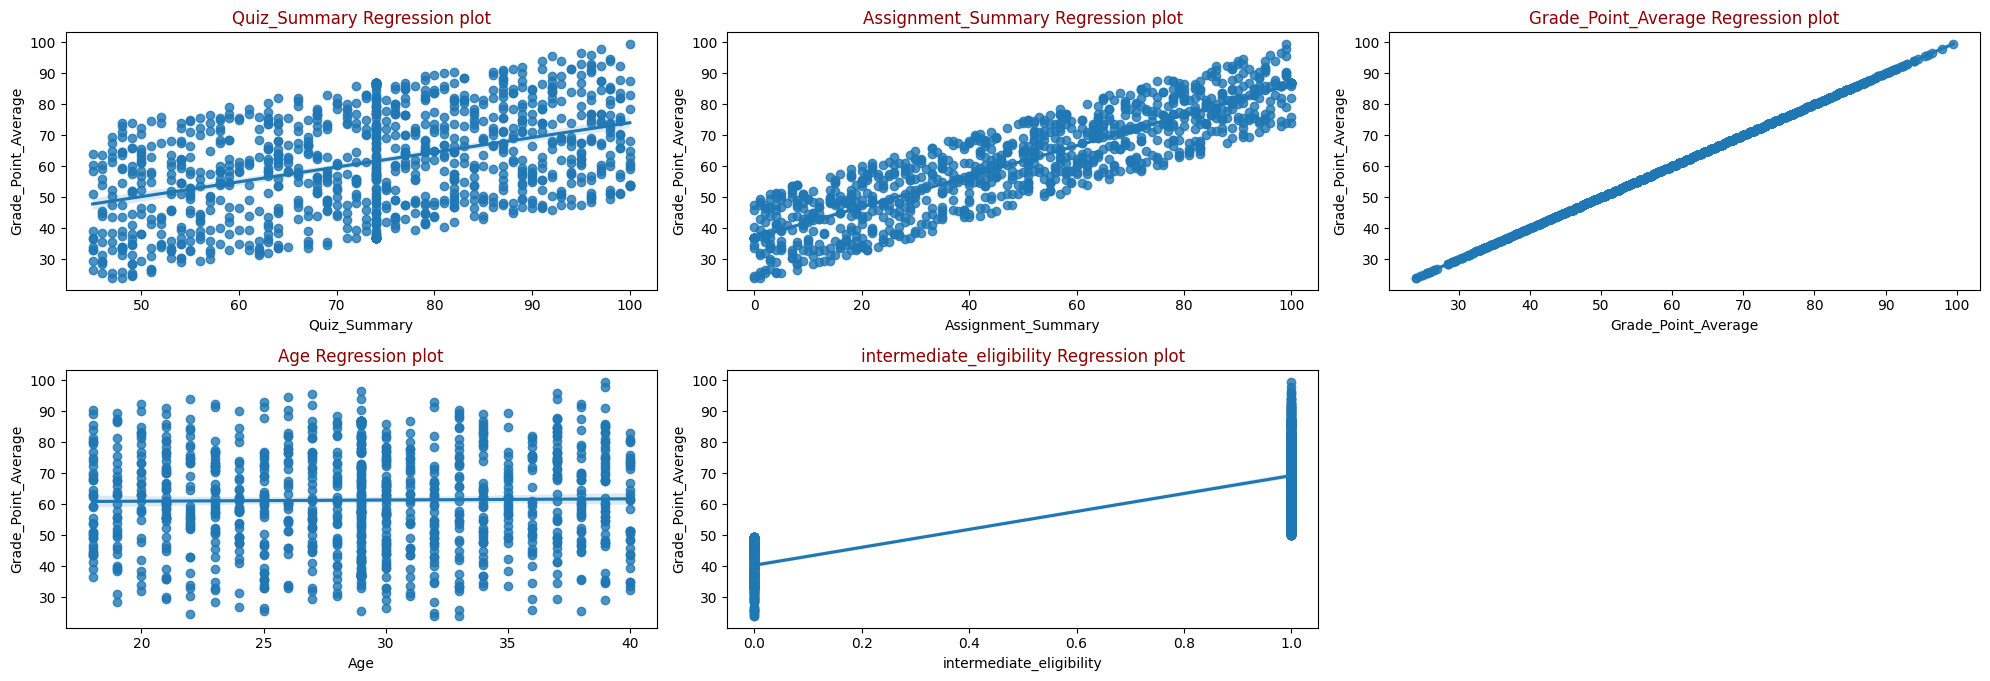

In [80]:
num_col = data.select_dtypes("number")
draw_regplot(num_col, num_col.columns, 6,3)

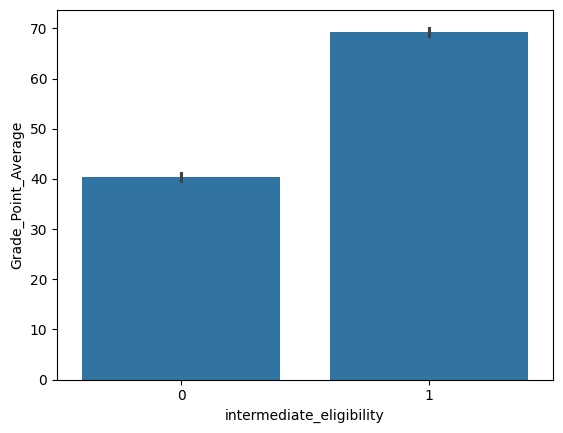

In [81]:
# Regression plot of intermediate_eligibility against Grade_point_average (put title)
sns.barplot(data=data, x= "intermediate_eligibility", y="Grade_Point_Average");

While other variables have a positive relationship with target variable, the age and Quiz_summary variables  have a negative correlation

In [82]:
# from ydata_profiling import ProfileReport

In [83]:
# ProfileReport(data)

In [84]:
data.select_dtypes("object").iloc[:, :1]

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
995,Male
996,Male
997,Female
998,Male


In [85]:
data.head()

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,74.0,0,37.0,Male,29.0,True,True,0
1,74.0,70,72.0,Male,29.0,True,True,1
2,74.0,80,77.0,Male,29.0,True,True,1
3,74.0,100,87.0,Male,29.0,True,True,1
4,74.0,80,77.0,Male,29.0,True,True,1


In [86]:
# Checking the correlation between the target variable and categorical variable
cat_col = data.select_dtypes("object").iloc[:, :1]

In [87]:
cat_col.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [88]:
cat_col = pd.get_dummies(cat_col, drop_first=True)

In [ ]:
cat_col.head()

In [89]:
data.Gender = cat_col

In [90]:
cat_col["intermediate"] = data["intermediate_eligibility"]

In [91]:
cat_col.corr()["intermediate"]

,intermediate
Gender_Male,-0.038516
intermediate,1.000000


The Female gender has a positive correlation with the target varible while the male gender has a negative relationship with the target variable

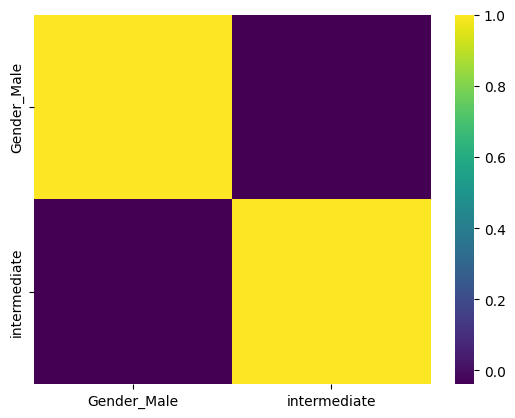

In [92]:
sns.heatmap(cat_col.corr(), cmap="viridis");

In [93]:
# Correlation heatmap between target variable and numerical variables

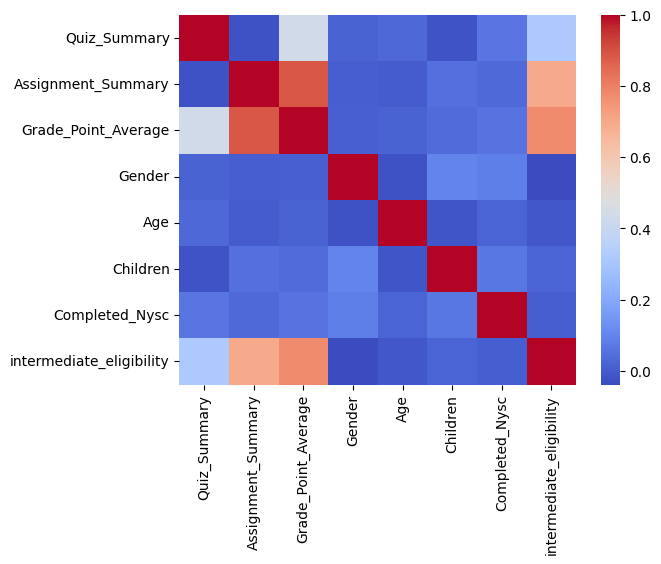

In [95]:
sns.heatmap(data.corr(), cmap="coolwarm");

### Data Transformation
Standardizing the data to the range between 0 and 1

In [96]:
# cat_col.drop(columns="intermediate", axis=1, inplace=True)

In [97]:
data

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,74.0,0,37.0,True,29.0,True,True,0
1,74.0,70,72.0,True,29.0,True,True,1
2,74.0,80,77.0,True,29.0,True,True,1
3,74.0,100,87.0,True,29.0,True,True,1
4,74.0,80,77.0,True,29.0,True,True,1
...,...,...,...,...,...,...,...,...
995,49.0,1,25.0,True,32.0,False,True,0
996,92.0,99,95.5,True,27.0,True,True,1
997,84.0,37,60.5,False,31.0,True,False,1
998,47.0,19,33.0,True,23.0,True,False,0


In [98]:
# data.head(3)

In [99]:
data.head(2)

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,74.0,0,37.0,True,29.0,True,True,0
1,74.0,70,72.0,True,29.0,True,True,1


In [100]:
# Assigning the target variable the label
target = data["intermediate_eligibility"]

In [101]:
## copy dataframe
data1 = data.drop(columns=["intermediate_eligibility"]).copy()

In [102]:
# Data without target
data1.head(2)

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
0,74.0,0,37.0,True,29.0,True,True
1,74.0,70,72.0,True,29.0,True,True


In [103]:
target

,intermediate_eligibility
0,0
1,1
2,1
3,1
4,1
...,...
995,0
996,1
997,1
998,0


### Modelling

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score

In [105]:
X_train, x_test, Y_train, y_test = train_test_split(data1, target,
                                                    test_size= 0.2,
                                                    random_state=42)

In [106]:
X_train

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
271,65.0,51,58.0,True,33.0,False,True
44,74.0,80,77.0,True,29.0,True,True
247,50.0,67,58.5,True,40.0,False,False
263,82.0,99,90.5,True,33.0,False,True
989,51.0,65,58.0,True,24.0,False,False
...,...,...,...,...,...,...,...
270,54.0,16,35.0,False,40.0,False,True
406,77.0,42,59.5,True,34.0,False,True
61,89.0,71,80.0,True,31.0,True,False
984,95.0,34,64.5,False,24.0,False,False


In [107]:
log = LogisticRegression()
dec = DecisionTreeClassifier()
rand = RandomForestClassifier()

In [108]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [109]:
for name, model in models.items():
    print(model.fit(X_train, Y_train))
    print(model.score(X_train, Y_train))

LogisticRegression()
1.0
DecisionTreeClassifier()
1.0
RandomForestClassifier()
1.0
SVC()
0.9799528301886793


In [110]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, x_test, Y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}

    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(x_test)
        training_accuracy = accuracy_score(training_predict, Y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on \
        training set and a score of {testing_accuracy} on testing set"
    return model_scores

In [111]:
# The logistic Regression and the SVC(support Vector Classifier) perform better among the models
fit_predict_and_score(models, X_train, x_test, Y_train, y_test)

{'Logistic Regression': ' has a  score of 1.0 on         training set and a score of 1.0 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on         training set and a score of 1.0 on testing set',
 'Random Forest': ' has a  score of 1.0 on         training set and a score of 1.0 on testing set',
 'SVC': ' has a  score of 0.9799528301886793 on         training set and a score of 0.9811320754716981 on testing set'}

In [112]:
log = LogisticRegression()
log.fit(X_train, Y_train)
y_pred_log = log.predict(x_test)

In [113]:
x_test

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
912,70.0,36,53.0,True,27.0,False,True
252,99.0,14,56.5,False,33.0,True,True
10,74.0,37,55.5,False,29.0,True,False
968,84.0,9,46.5,True,27.0,False,False
961,83.0,83,83.0,True,34.0,False,True
...,...,...,...,...,...,...,...
55,74.0,0,37.0,True,29.0,True,True
60,77.0,51,64.0,True,25.0,True,False
353,89.0,61,75.0,False,40.0,True,False
25,74.0,98,86.0,True,29.0,True,True


In [114]:
y_pred_log

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [115]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
y_pred = forest.predict(x_test)

In [116]:
forest.predict_proba(x_test)

array([[0.02, 0.98],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  ,

In [117]:
forest.predict([[51.0,1,1,16.0,False,True,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

### Model Evaluation

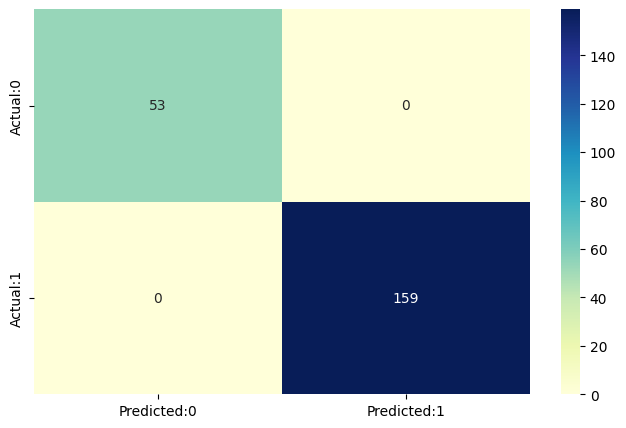

In [118]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"],
                           index=["Actual:0", "Actual:1"])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");

The confusion matrix shows 101+111 = 212 correct predictions and 0 incorrect ones.

- True Positives:  111
- True Negatives:  101
- False Positives: 0 (*Type I error*)
- False Negatives: 0 ( *Type II error*)

In [119]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [120]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = '
      ,(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  1.0 
 The Missclassification = 1-Accuracy =  0.0 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


<ipython-input-120-2bc95fb05db0>:14: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


**From the above statistics it is clear that the model is both sensitive and specific. The positive values are predicted more accurately the negative values are also predicted accurately.**

### Making a Predictive System
Giving my model a data instance to make prediction on

In [121]:
x_test.head(2)

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
912,70.0,36,53.0,True,27.0,False,True
252,99.0,14,56.5,False,33.0,True,True


In [122]:
X_train.head(1)

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc
271,65.0,51,58.0,True,33.0,False,True


In [123]:
target

,intermediate_eligibility
0,0
1,1
2,1
3,1
4,1
...,...
995,0
996,1
997,1
998,0


In [ ]:
np.asarray(input_data).reshape(1, -1).shape

In [124]:
input_data = (70,69,65,1,25,True,False)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array so the model will understand I am making prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = forest.predict(input_data_reshaped)

if prediction[0] == 0:
    print("This student is not eligible for intermediate class")
else:
    print("This student is eligible for intermediate class")

This student is eligible for intermediate class


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Saving the trained model

In [125]:
import pickle

In [ ]:
filename = "trained_model.sav"
pickle.dump(forest, open(filename, "wb"))

In [ ]:
# #loading the saved model
loaded_model = pickle.load(open("trained_model.sav", "rb"))

In [128]:
input_data = (70,69,65,1,25,True,False)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array so the model will understand I am making prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("This student is not eligible for intermediate class")
else:
    print("This student is eligible for intermediate class")

This student is eligible for intermediate class


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [129]:
#loaded_model = pickle.load(open("Downloads",mode="rb"))

### Conclusions
A complete data science process was carried out on the Citrone dataset.

The dataset was appropriately cleaned. Some of the columns were dropped to make the analysis quick and concise. Various statistical summaries like histogram plots, correlation plots, and scatter plots were plotted to show the relationship between different columns and make the data fit for machine learning models.

Machine learning models were trained with 80% of the data and tested on 20% of the data. The models performed well with more than 90% accuracy on the test dataset.
The model was evaluated and deployed to evaluate its performance.
